# Probability, statistics, and information theory: exercise tasks

In [1]:
from helpers import *

# Univariate data

## Task 1: Specifying a univariate Gaussian 
The code in the cell below creates plot of a probability density function (pdf) of a 
univariate Gaussian whose parameter values can be (re)set interactively.

Play with setting the parameter values, and select parameter values that are different from the default ones. 

In the 'Answer'-section, briefly describe in the empty cell i) what do the parameters mean/control, ii) how does changing them can be seen from the plot, and iii) what parameter values did you choose

In [2]:
interactive_plot = plot_and_specify_univariate_gaussian_interactively()
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$\\mu$', max=2.0, min=-2.0, step=0.5), FloatSlider(v…

In [3]:
mu, sigma, _, __ = interactive_plot.result # extracts the parameter values from the interactive plot instance 

### Answer
Input your answers to the cell below.

1) The normal (guassian) distribution is known for 2 parameters:
 
 The parameter u (mu) is the expected value or the mean, and it is the centroid of the pdf and it controlls the point at which the pdf is maximum.
 𝜎 is standard deviation;(variance=𝜎²); is a measure of how dispersed the data is in relation to the mean, the higher the standard of deviation the more the data is spread out around the mean.
 
 2) Changing the parameters and the results, and 3) chosen values:
 
 When mu is at the value 0, the mean is at 0, so the peak changes according to if we vary the value of the expected value. However even if changing the value of the expected value to 1 for example, it shifts the entire curve right on the X-axis, but the curves still have the same standard deviation.

 When changing 𝜎 from 1 to 2, the curve becomes more spread out, since the standard deviation determines how far away from the mean the values tend to fall. Larger standard deviations produce wider distributions.
When you have narrow distributions, the probabilities are higher that values won’t fall far from the mean.


## Task 2: Sampling from the distribution 
Now let's draw a bunch of samples from the distribution and look what kind of values did we get out.

The following cell i) draws samples from the distribution, ii) calculates a normalized histogram of the samples (to get an approximate representation of the density of the sample values), iii) plots the distribution we are sampling from (in blue) and the obtained normalized histogram (in magenta with a bar plot and in cyan using a curve). 

Play with the values of the variables 'num_samples' (default is 10) and 'num_bins' (default is 10).  

Change their values so that the match between the blue coloured curve (true density) and the cyan coloured curve (density representation of samples via a normalized histogram) is improved, ideally good.

In the 'Answer'-section, briefly describe in the empty cell how did you change the parameter values and why did they result in a better result.

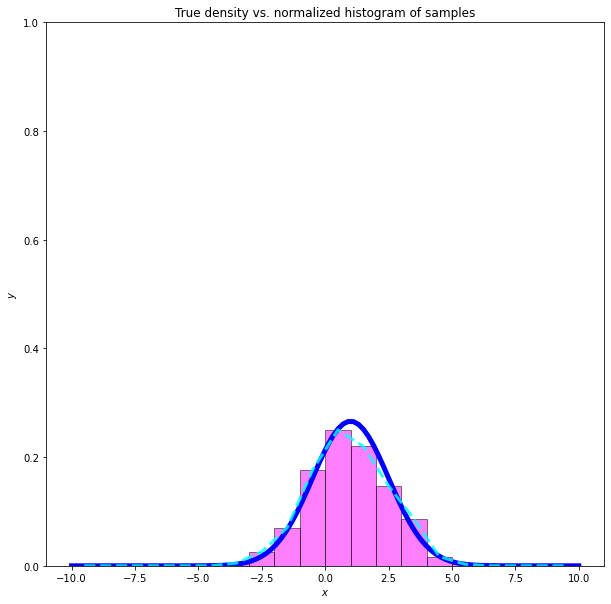

In [4]:
# sample from the distribution
num_samples = 1000 
samples = mu+sigma*np.random.randn(num_samples)

# get an approximate representation of the density 
num_bins = 20
bin_centers, normalized_bin_counts = histogram_estimation_of_univariate_data_density(samples, nbins=num_bins)

# plot the true density and the histogram based approximate density
_,__, fig, ax = plot_univariate_gaussian_pdf(mu, sigma)
ax.plot(bin_centers, normalized_bin_counts, linestyle='dashed', color='cyan', linewidth=3, alpha=0.8)
ax.bar(bin_centers, normalized_bin_counts, width=20./num_bins, color='magenta', 
       edgecolor='black' if num_bins<= 100 else 'magenta', alpha=0.5)
ax.set_title('True density vs. normalized histogram of samples');

### Answer
Input your answers to the cell below.

In order to make the blue curve (true density) and the cyan coloured curve, we will be changing the parameters values and the variable values accordingly.

Two parameters controll the histogram: the num_samples and the num_bins.
The samples parameter controlls how many data we have, so the bigger the more accurate it is.
Changing the number of bins, I noticed, the higher the number of bins, the more bars we have on the histogram and vice versa.
Playing with these parameters for some time, I notice that the peak tends to be between (0.0 and 2.5)

So I set the blue curve's mean (mu) at around 1. 
And the standard derivation to 1.5 .

I add more samples, so we set the number of samples at 1000
I change the number of bins at 20.

The resut shows that the blue and cyan curves match. The blue curve passes by the middles of all the bins of this distribution as well.


## Task 3: Estimating true parameter values based on data samples
Now let's estimate true parameter values of the distribution, from a set of samples from the true distribution. Let us do that for a varying amount of samples, and let us also assess estimation effectiveness for each case. Let us assess the effectiveness by comparing true and estimated parameter values, and the KL-divergence between the true and the estimated distribution.

Codes for doing all of that is provided in the cell below. Your task is to replace
the parameter estimators to be better ones, ideally the best ones; there are two lines
of code that you should change, one starting with 'mu_estimate = ' and the other starting
with 'sigma_estimate = ', the ones between the two lines containing comment 'CHANGE CODE'.

In the 'Answer'-section, briefly describe i) your changes, ii) how and why did the results improve, and iii) the dependency on the estimation effectiveness to the amount of samples used when considering the improved approach.

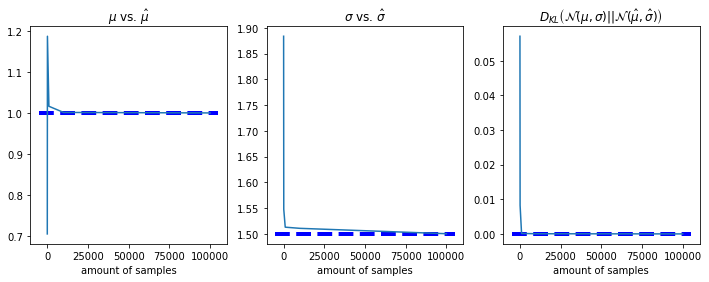

In [6]:
num_samples_list = [10**1, 10**2, 10**3, 10**4, 10**5]
num_samples_cases = len(num_samples_list)
mu_estimates = np.empty((num_samples_cases,), dtype=float)
sigma_estimates = np.empty((num_samples_cases,), dtype=float)
kl_divergences = np.empty((num_samples_cases,), dtype=float)

# get samples, estimate parameters, assess effectiveness: 
# loop over the varying case of differing amount of samples
# ----------------------------------------------------------

for num_samples_case_index, num_samples in enumerate(num_samples_list):
    # sample from the distribution
    samples = mu+sigma*np.random.randn(num_samples)
    
    # estimate parameter values from the distribution
    ###########################################################################
    # ----------> CHANGE CODE: IMPROVE THE ESTIMATORS, IF IMPROVING IS POSSIBLE
    mu_estimate = np.sum(samples)/num_samples
    sigma_estimate = np.sqrt(np.sum((samples-mu_estimate)**2)/(num_samples-1)) 
    # < --------- CHANGE CODE 
    ###########################################################################
    
    # calculate KL-divergence between true and estimated distribution
    kl_div = kl_divergence_between_two_univariate_gaussians(mu, sigma, mu_estimate, sigma_estimate)
    
    # record the obtained parameter values and the KL-divergence
    mu_estimates[num_samples_case_index] = mu_estimate
    sigma_estimates[num_samples_case_index] = sigma_estimate
    kl_divergences[num_samples_case_index] = kl_div
    
# plot results
# -------------
# create figure infrastructure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[12, 4], gridspec_kw={'height_ratios': [1]})

# plot mu vs mu_estimated
ax1.plot(np.array(num_samples_list), mu_estimates); xlim = ax1.get_xlim()
ax1.hlines(mu, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax1.set_title(r'$\mu$ vs. $\hat{\mu}$'); ax1.set_xlabel('amount of samples')

# plot sigma vs sigma_estimated
ax2.plot(np.array(num_samples_list), sigma_estimates); xlim = ax2.get_xlim()
ax2.hlines(sigma, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax2.set_title(r'$\sigma$ vs. $\hat{\sigma}$'); ax2.set_xlabel('amount of samples')

# plot KL-divergence (p_true || p_estimated)
ax3.plot(np.array(num_samples_list), kl_divergences); xlim = ax3.get_xlim()
ax3.hlines(0, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax3.set_title(r'$D_{KL}\left(\mathcal{N}(\mu, \sigma) \|| \mathcal{N}(\hat{\mu}, \hat{\sigma})\right)$')
ax3.set_xlabel('amount of samples');

### Answer
Input your answers to the cell below.

1) The changes:
  mu_estimate = np.sum(samples)/num_samples
  sigma_estimate = np.sqrt(np.sum((samples-mu_estimate)**2)/(num_samples-1))

2) How and why did the results improve:
  From the figures we can see that the both curves are touching each other at all the points showing the amount of samples. And that is because the changes are working ideally, because of the big amount of samples, and also because of different trials. The kl-divergence value is so low after the changes. And the true distribution matches our estimation. The properties of an estimator are unbiasedness, efficiency, and consistency.

3)  The dependency on the estimation effectiveness to the amount of samples used when considering the improved approach:
   Larger sample sizes generally lead to increased precision when estimating. As sample sizes increase, the sampling distributions approach a normal distribution. With "infinite" numbers of successive random samples, the mean of the sampling distribution is equal to the population mean (µ).


# Multivariate data
Similar as above, but for multivariate (bivariate) data.

## Task 4: Specifying a multivariate Gaussian 
The code in the cell below creates a plot of a probability density function (pdf) of a 
bivariate Gaussian whose parameter values can be (re)set interactively.

Play with setting the parameter values, and select parameter values that are different from the default ones. 

In the 'Answer'-section, briefly describe in the empty cell i) what do the parameters mean/control, ii) how does changing them can be seen from the plot, and iii) what parameter values did you choose

In [9]:
interactive_plot = plot_and_specify_bivariate_gaussian_interactively()
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$\\mu_1$', max=2.0, min=-2.0, step=0.5), FloatSlider…

In [10]:
mu, K, _, __ = interactive_plot.result # extracts the parameter values from the interactive plot instance 

### Answer
Input your answers to the cell below.

1) The parameters meanings and what do they controll:

The parameters in a multivariate distribution are as follow:
u1 (mu1) is the expected value on the axis x1 ( the one starting from the left). mu1 controlls the point at which the pdf is maximum on this axis. The same thing for mu2 but on the axis x2.

 𝜎1 is standard deviation;(variance=𝜎²); is a measure of how dispersed the data is in relation to the mean on axis x1. The same thing for 𝜎2 but on axis x2.
 
 The last parameter is ρ (covariance) and it is the measure of the joint variability of x1 and x2. If the greater values of x1 mainly correspond with the greater values of the x2, the covariance is positive. In the opposite case, when the greater values of x1 correspond to the lesser values of x2, the covariance is negative. The mathematical expression of a covariance is equal to the correlation times the product of the two standard deviations. In other words, a positive covariance means that both variables tend to be high or low at the same time. A negative covariance means that when one variable is high, the other tends to be low.
 
  2) Changing the parameters and the results, and 3) chosen values:
  When we change mu1 from 0 to 1, the curve moves to the right parallel to the axis x1 ( a negative value woumd have made the curve move left.
  When we change mu2 from 0 to -1, the curve moves to the left parallet to the axis x2 and vertical to the axis x1.
  
  When we change 𝜎1 from 0.5 to 1, the curve becomes more spread out and the projection of the extremity of the curve is between (-2,2) on the axis x1.
  When we change 𝜎2 from 0.5 to 2, the curve becomes more spread out parallel to the axis x2, and the projection of the extremity of the curve is between (-4,4) on the axis x2.
  
  When we alter the values of ρ, we see a difference in height and direction of the curve ( when it is turning right = covariance positive) and vice versa. 

## Task 5: Sampling from the distribution and estimating true parameter values based on the samples
Now let's draw a bunch of samples from the (chosen) distribution, and based on them, let's estimate the true parameter values of the distribution. Let us do that for a varying amount of samples, and let us also assess estimation effectiveness for each case. Let us assess the effectiveness by comparing the true and estimated parameter values, and the KL-divergence between the true and the estimated distribution.

Codes for doing all of that is provided in the cell below. Your task is to replace
the parameter estimators to be better ones, ideally the best ones; there are two lines
of code that you should change, one starting with 'mu_estimate = ' and the other starting
with 'K_estimate = ', the ones between the two lines containing comment 'CHANGE CODE'.

In the 'Answer'-section, briefly describe i) your changes, ii) how and why did the results improve, and iii) the dependency on the estimation effectiveness to the amount of samples used when considering the improved approach. 

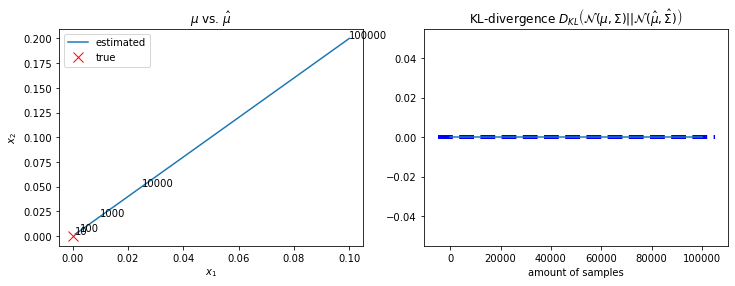

In [14]:
num_samples_list = [10**1, 10**2, 10**3, 10**4, 10**5]
num_samples_cases = len(num_samples_list)
mu_estimates = np.empty((num_samples_cases, 2), dtype=float)
kl_divergences = np.empty((num_samples_cases,), dtype=float)

# get samples, estimate parameters, assess effectiveness: 
# loop over the varying case of differing amount of samples
# ----------------------------------------------------------

for num_samples_case_index, num_samples in enumerate(num_samples_list):
    # sample from the distribution
    samples = np.random.multivariate_normal(mean=mu.flatten(), cov=K, size=num_samples)
    
    # estimate parameter values from the distribution
    ###########################################################################
    # ----------> CHANGE CODE: IMPROVE THE ESTIMATORS, IF IMPROVING IS POSSIBLE
    
    # compute_sample_covariance: function to compute sample covariance matrix from centered data
def compute_sample_covariance(centered_data_matrix, method='built-'):
    '''
    inputs:
    -------
    centered_data_matrix: rows index examples, columns index dimensions/variables
    method: string ['built-in', 'incremental', or 'vectorized'] specifying which approach to adopt in calculation, 
            differences only in implementation; built-in utilizes NumPy's own function, the others are own implementations.
    
    outputs:
    --------
    sample_covariance: sample covariance matrix
    '''
    if method == 'built-in':
        sample_covariance = np.cov(centered_data_matrix.transpose())
    elif method == 'incremental': 
        [num_examples, num_dimensions] = centered_data_matrix.shape
        sample_covariance = np.zeros((num_dimensions, num_dimensions))
        for sample_index in np.arange(num_examples):
            sample_covariance += np.dot(centered_data_matrix[sample_index:sample_index+1, :].transpose(), centered_data_matrix[sample_index:sample_index+1, :])  
        sample_covariance = sample_covariance/(num_examples-1)
    elif method == 'vectorized': # no for-loops, speed-benefits
        [num_examples, num_data_dimensions] = centered_data_matrix.shape
        sample_covariance = np.dot(centered_data_matrix.transpose(), centered_data_matrix)/(num_examples-1)
    return sample_covariance
    mu_estimates = np.sum(samples, axis=0, keepdims=True)/num_samples
    Kl_estimates = compute_sample_covariance(samples-mu_estimate, 'vectorized')
    

    # < --------- CHANGE CODE 
    ###########################################################################
    
    # calculate KL-divergence between the true and estimated distribution
    kl_div = kl_divergence_between_two_multivariate_gaussians(mu, K, mu_estimates, Kl_estimates)
    
    # record the obtained parameter values, the KL-divergence, and the normalized log-likelihood
    mu_estimates[num_samples_case_index, :] = mu_estimate.copy()
    kl_divergences[num_samples_case_index] = kl_div
    
# plot results
# -------------

# create figure infrastructure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[12, 4], gridspec_kw={'height_ratios': [1]})

# plot mu vs mu_estimated
ax1.plot(mu_estimates[:, 0], mu_estimates[:, 1], label='estimated') 
for num_samples_case_index, num_samples in enumerate(num_samples_list):
    ax1.text(mu_estimates[num_samples_case_index, 0], mu_estimates[num_samples_case_index, 1], str(num_samples))
ax1.plot(mu[0, 0], mu[0, 1], 'x', color='r', markersize=10, label='true')
ax1.set_xlabel(r'$x_1$'); ax1.set_ylabel(r'$x_2$') 
ax1.set_title(r'$\mu$ vs. $\hat{\mu}$'); ax1.legend()

# plot KL-divergence (p_true || p_estimated)
ax2.plot(np.array(num_samples_list), kl_divergences); xlim = ax2.get_xlim()
ax2.hlines(0, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax2.set_title(r'KL-divergence $D_{KL}\left(\mathcal{N}(\mu, \Sigma) \|| \mathcal{N}(\hat{\mu}, \hat{\Sigma})\right)$')
ax2.set_xlabel(r'amount of samples');

### Answer
Input your answers to the cell below.

1) The changes:
 Add a function and change mu_estimates = ' and 'Kl_estimates' and debug the code (code from class):
 def compute_sample_covariance(centered_data_matrix, method='built-'):
    '''
    inputs:
    -------
    centered_data_matrix: rows index examples, columns index dimensions/variables
    method: string ['built-in', 'incremental', or 'vectorized'] specifying which approach to adopt in calculation, 
            differences only in implementation; built-in utilizes NumPy's own function, the others are own implementations.
    
    outputs:
    --------
    sample_covariance: sample covariance matrix
    '''
    if method == 'built-in':
        sample_covariance = np.cov(centered_data_matrix.transpose())
    elif method == 'incremental': 
        [num_examples, num_dimensions] = centered_data_matrix.shape
        sample_covariance = np.zeros((num_dimensions, num_dimensions))
        for sample_index in np.arange(num_examples):
            sample_covariance += np.dot(centered_data_matrix[sample_index:sample_index+1, :].transpose(), centered_data_matrix[sample_index:sample_index+1, :])  
        sample_covariance = sample_covariance/(num_examples-1)
    elif method == 'vectorized': # no for-loops, speed-benefits
        [num_examples, num_data_dimensions] = centered_data_matrix.shape
        sample_covariance = np.dot(centered_data_matrix.transpose(), centered_data_matrix)/(num_examples-1)
    return sample_covariance
   mu_estimates = np.sum(samples, axis=0, keepdims=True)/num_samples
   Kl_estimates = compute_sample_covariance(samples-mu_estimate, 'vectorized')
    
 

2) How and why did the results improve:
  We can see from the left graph that the estimated  values and the true values are the same. It shows clearly again from the right grapgh of the Kl_divergence that the divergence between the true and extimated value is non existent. Which makes our estimation ideal after changing the code.

3)  The dependency on the estimation effectiveness to the amount of samples used when considering the improved approach:
   Larger sample sizes generally lead to increased precision when estimating. As sample sizes increase, the sampling distributions approach a normal distribution. With the smaller sample size there were large gaps between each possible sample proportion. When the sample size increased, the gaps between the possible sampling proportions decreased. With the larger sampling size the sampling distribution approximates a normal distribution.